# Exploratory Data Analysis using Python

Analysing responses from the Stack Overflow Annual Developer Survey-2020

## Introduction

In this Project, we'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey.

It seems like the dataset contains three files:

- `README.txt` - Information about the dataset
- `survey_results_schema.csv` - The list of questions, and shortcodes for each question
- `survey_results_public.csv` - The full list of responses to the questions 


## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the CSV file

In [2]:
survey_raw_data = pd.read_csv("/Users/shouryasinghchouhan/Downloads/stack-overflow-developer-survey-2020/survey_results_public.csv")

In [3]:
survey_raw_data

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains over 64,000 responses to 60 questions (although many questions are optional). 

In [4]:
survey_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [5]:
survey_raw_data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [6]:
schema_raw = pd.read_csv("/Users/shouryasinghchouhan/Downloads/stack-overflow-developer-survey-2020/survey_results_schema.csv", index_col = "Column").QuestionText

In [7]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [8]:
schema_raw["YearsCodePro"]

'NOT including education, how many years have you coded professionally (as a part of your work)?'

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [9]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [10]:
len(selected_columns)

20

In [11]:
survey_df = survey_raw_data[selected_columns].copy()

In [12]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
schema = schema_raw[selected_columns]

In [14]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [15]:
survey_df.shape

(64461, 20)

In [16]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

It appears that some columns contains empty values as Non-Null values are less than the total number of rows. 

In [17]:
schema.YearsCode

'Including any education, how many years have you been coding in total?'

In [18]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [19]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [20]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [21]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [22]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to `NaN`.

In [23]:
survey_df["Age1stCode"] = pd.to_numeric(survey_df["Age1stCode"], errors = "coerce")
survey_df["YearsCode"] = pd.to_numeric(survey_df["YearsCode"], errors = "coerce")
survey_df["YearsCodePro"] = pd.to_numeric(survey_df["YearsCodePro"], errors = "coerce")

In [24]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


From the aobve, we can see that max value of Age is 279 and min value of Age is 1 which are not possible. One way to remove these errors by ignoring the age which is higher than 100 years and lower than 10 years. We will do this by using drop method

In [25]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)

In [26]:
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)

In [27]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45436.000000,57467.000000,56776.000000,44128.000000,41147.000000
mean,30.834294,15.476273,12.783130,8.870354,40.782153
std,9.506982,5.113997,9.490771,7.760095,17.816102
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,99.000000,85.000000,50.000000,50.000000,475.000000


The same holds for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [28]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

In [29]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [30]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [31]:
survey_df.Gender.value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [32]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [33]:
survey_df.Gender.value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [34]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important


## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community.

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [35]:
schema.Country

'Where do you live?'

In [36]:
survey_df.Country.unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic', nan,
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Iran', 'Croatia', 'Egypt', 'Argentina', 'Ghana',
       'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guatemala', '

In [37]:
top_countries = survey_df.Country.value_counts().head(10)

In [38]:
top_countries

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

/Users/shouryasinghchouhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Country'>

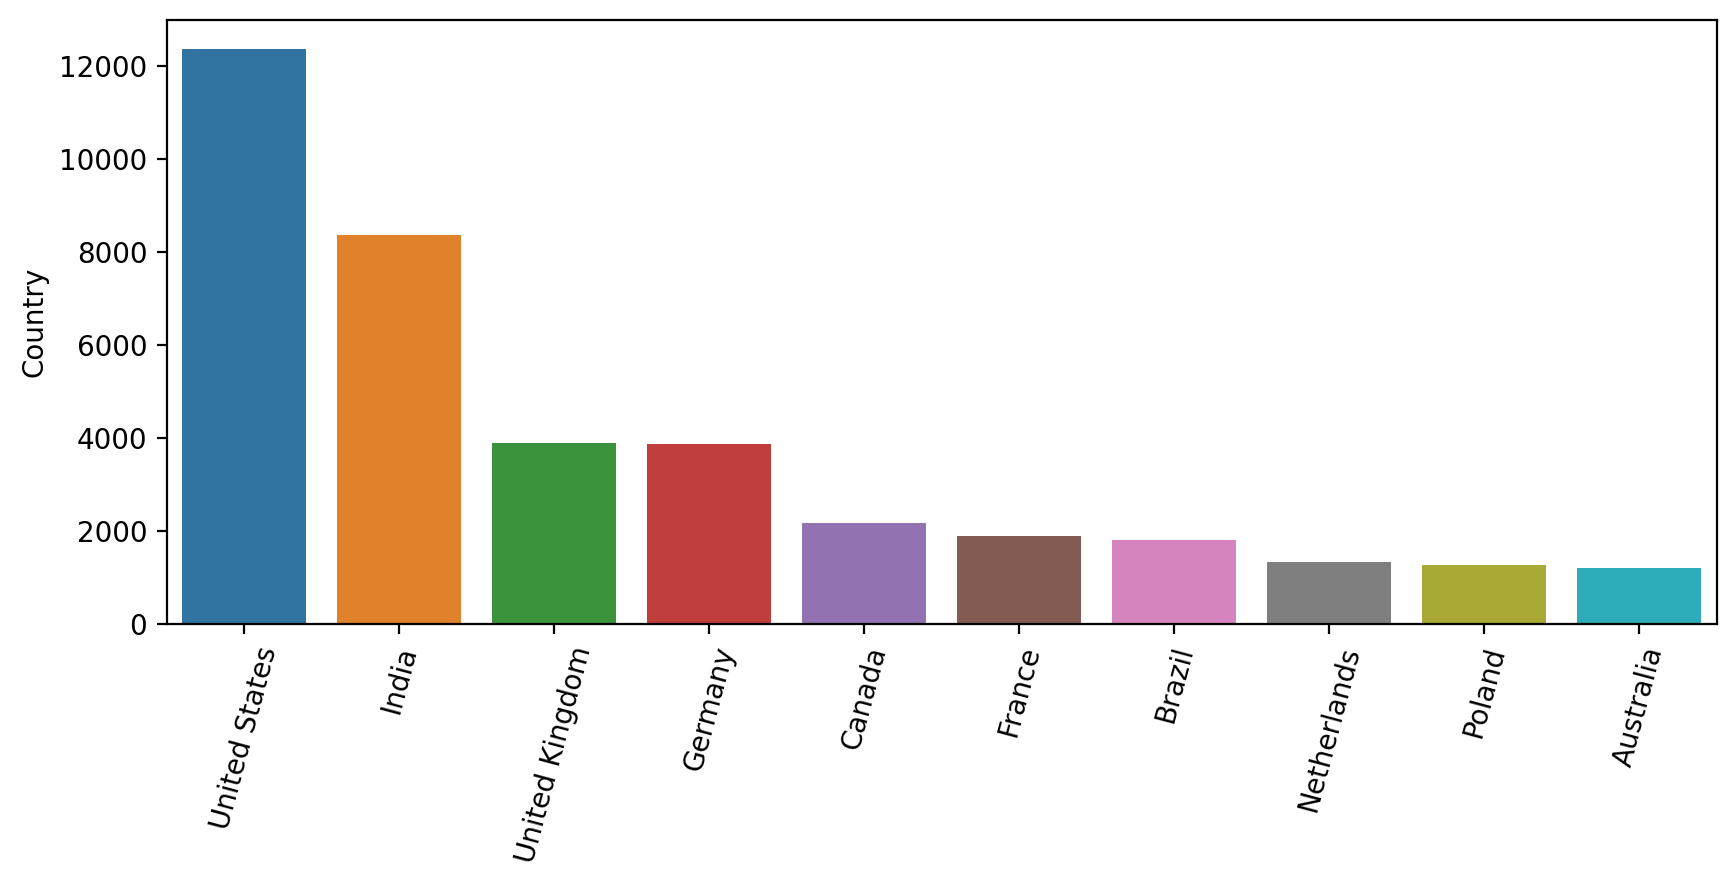

In [39]:
plt.figure(figsize=(10,4),dpi=200)
plt.xticks(rotation=75)
sns.barplot(top_countries.index, top_countries)

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

In [40]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [41]:
survey_df.Age.value_counts()

25.0    2660
28.0    2392
30.0    2391
26.0    2372
27.0    2315
        ... 
14.7       1
32.5       1
26.5       1
96.0       1
14.5       1
Name: Age, Length: 105, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

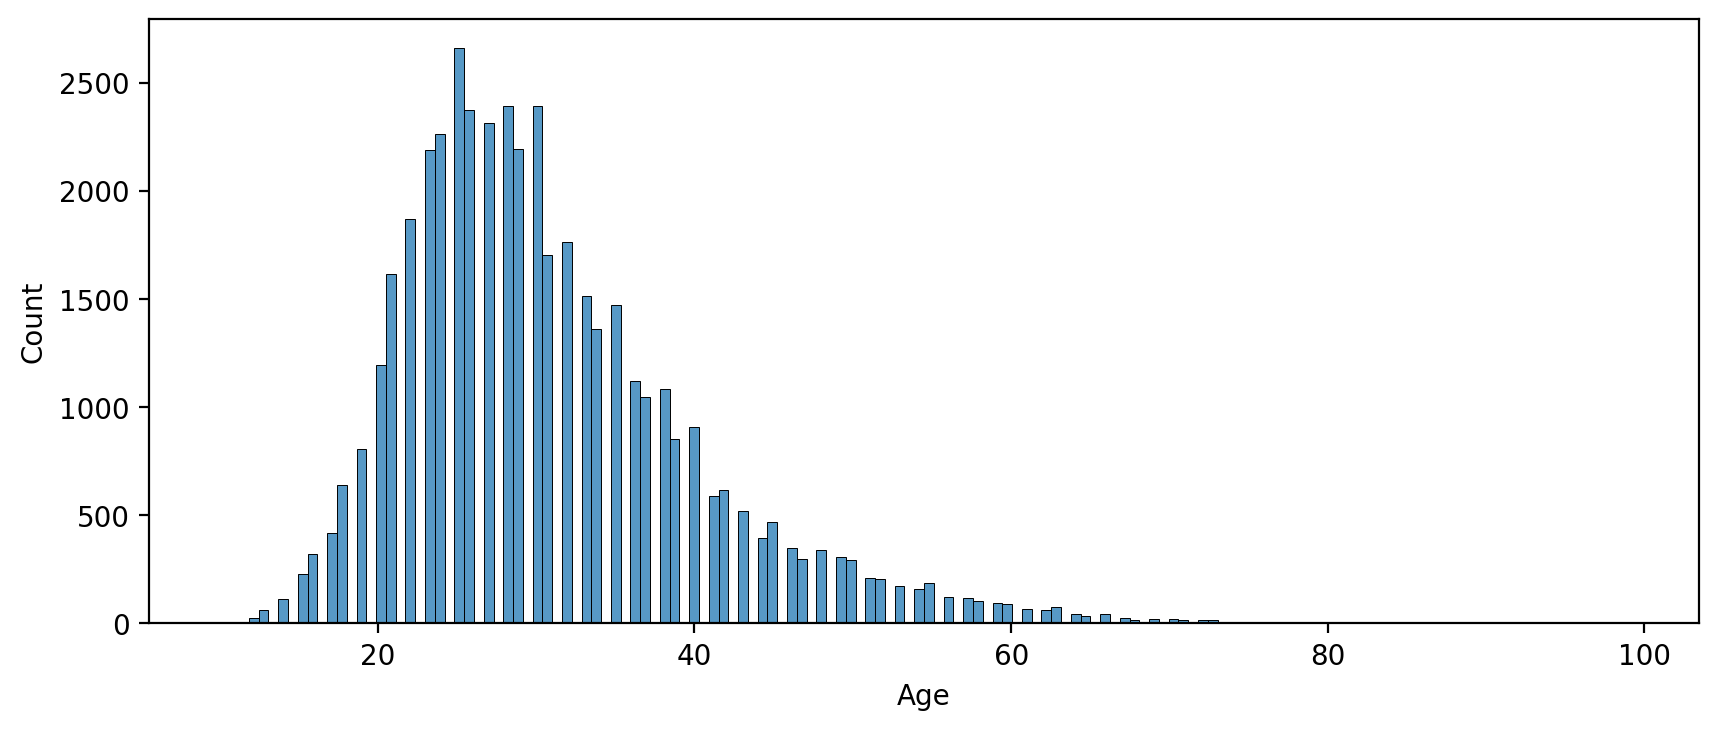

In [42]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data = survey_df, x = "Age")

<AxesSubplot:xlabel='Age', ylabel='Count'>

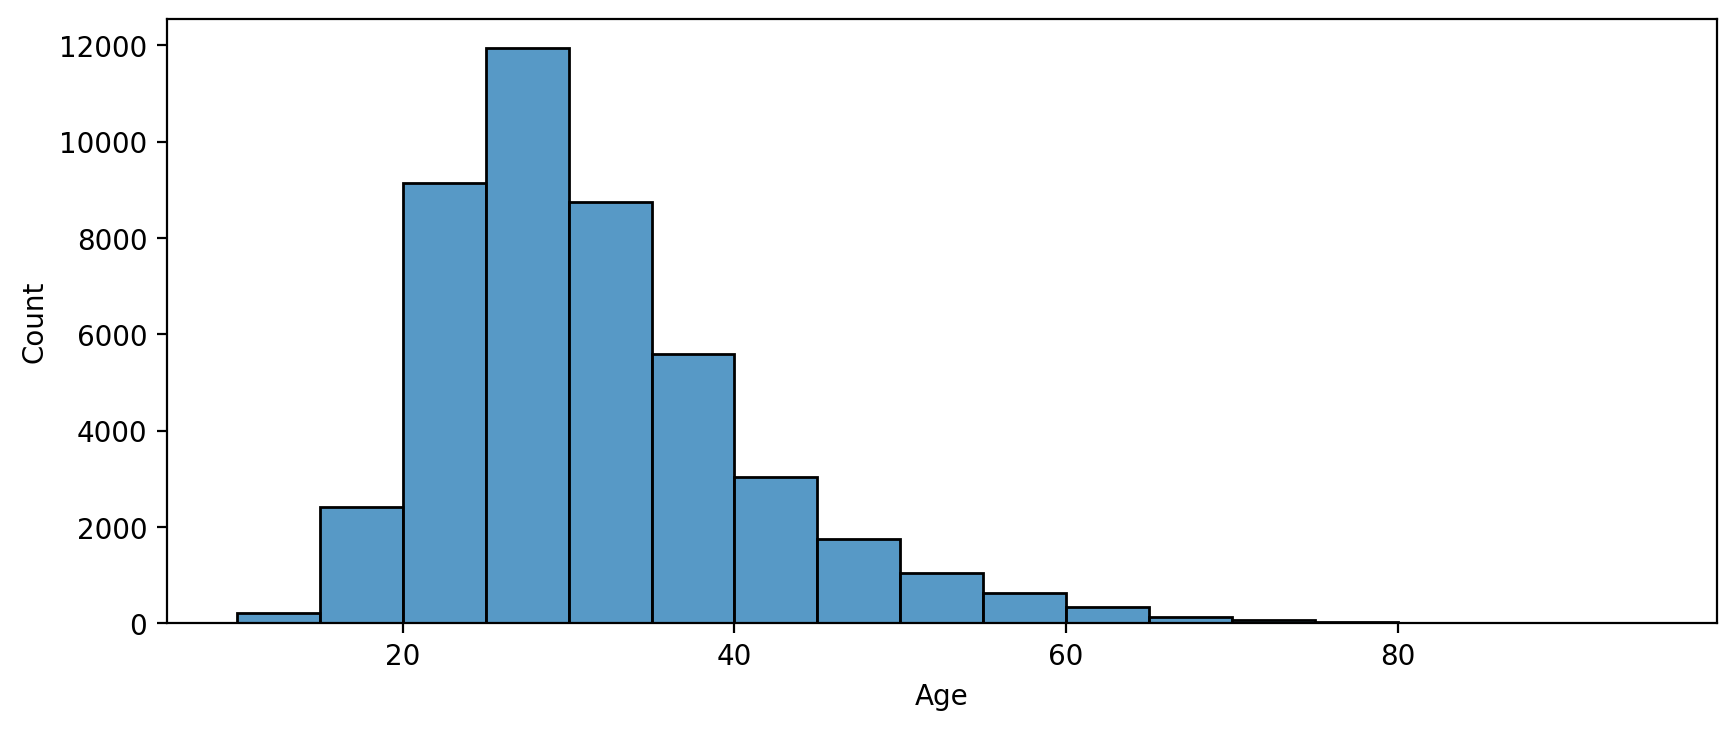

In [43]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data = survey_df,bins = np.arange(10,100,5), x = "Age")

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

schema.Gender

In [44]:
gender = survey_df.Gender.value_counts(dropna = False)

In [45]:
gender

Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

/Users/shouryasinghchouhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Gender'>

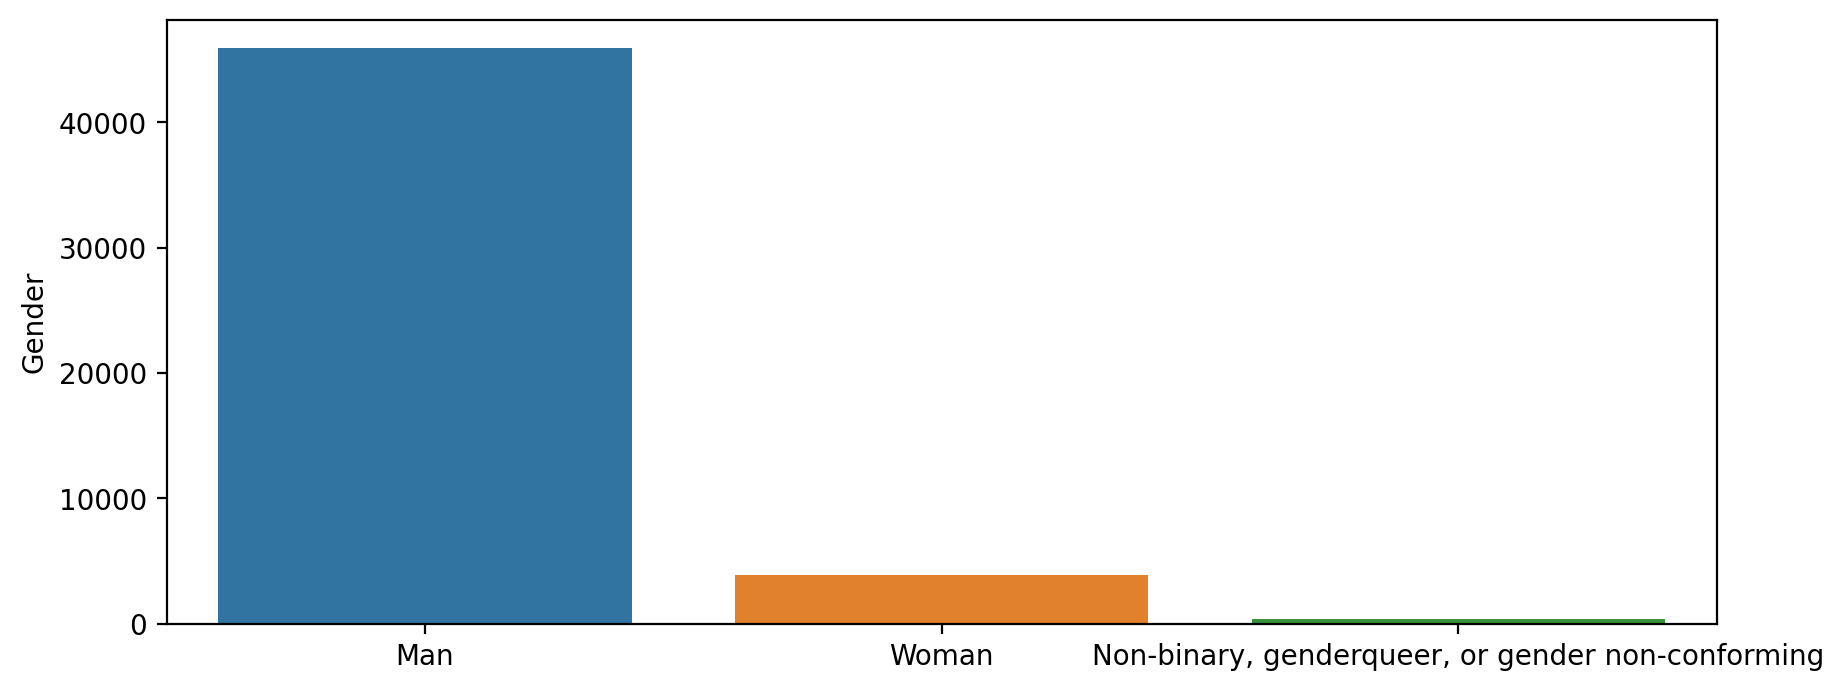

In [46]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(gender.index, gender)

([<matplotlib.patches.Wedge at 0x7fc3a264d5e0>,
 [Text(-0.6842470564156531, 0.8612815833317895, 'Man'),
  Text(0.4934478967644442, -0.9831119840479754, 'nan'),
  Text(1.0722804576603289, -0.2453866746988429, 'Woman'),
  Text(1.099805434450253, -0.020688314423613293, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(-0.37322566713581073, 0.4697899545446124, '71.4%'),
  Text(0.2691533982351514, -0.5362429003898047, '22.1%'),
  Text(0.5848802496329066, -0.13384727710845976, '6.0%'),
  Text(0.5998938733365016, -0.011284535140152705, '0.6%')])

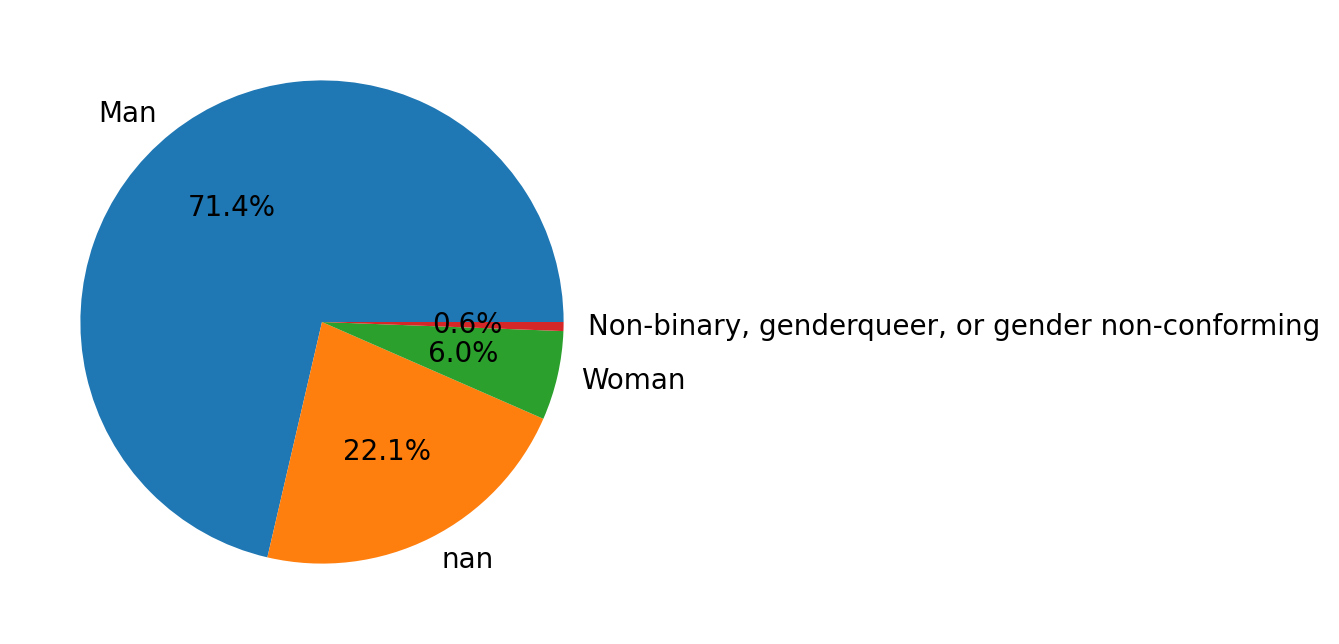

In [47]:
plt.figure(figsize=(10,4),dpi=200)
plt.pie(x = gender,labels = gender.index, autopct = "%1.1f%%")

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

In [48]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [49]:
survey_df.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26356
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13024
Some college/university study without earning a degree                                 7163
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4724
Associate degree (A.A., A.S., etc.)                                                    1831
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1681
Primary/elementary school                                                               929
Professional degree (JD, MD, etc.)                                                      793
I never completed any formal education                                                  480
Name: EdLevel, dtype: int64

<AxesSubplot:xlabel='count', ylabel='EdLevel'>

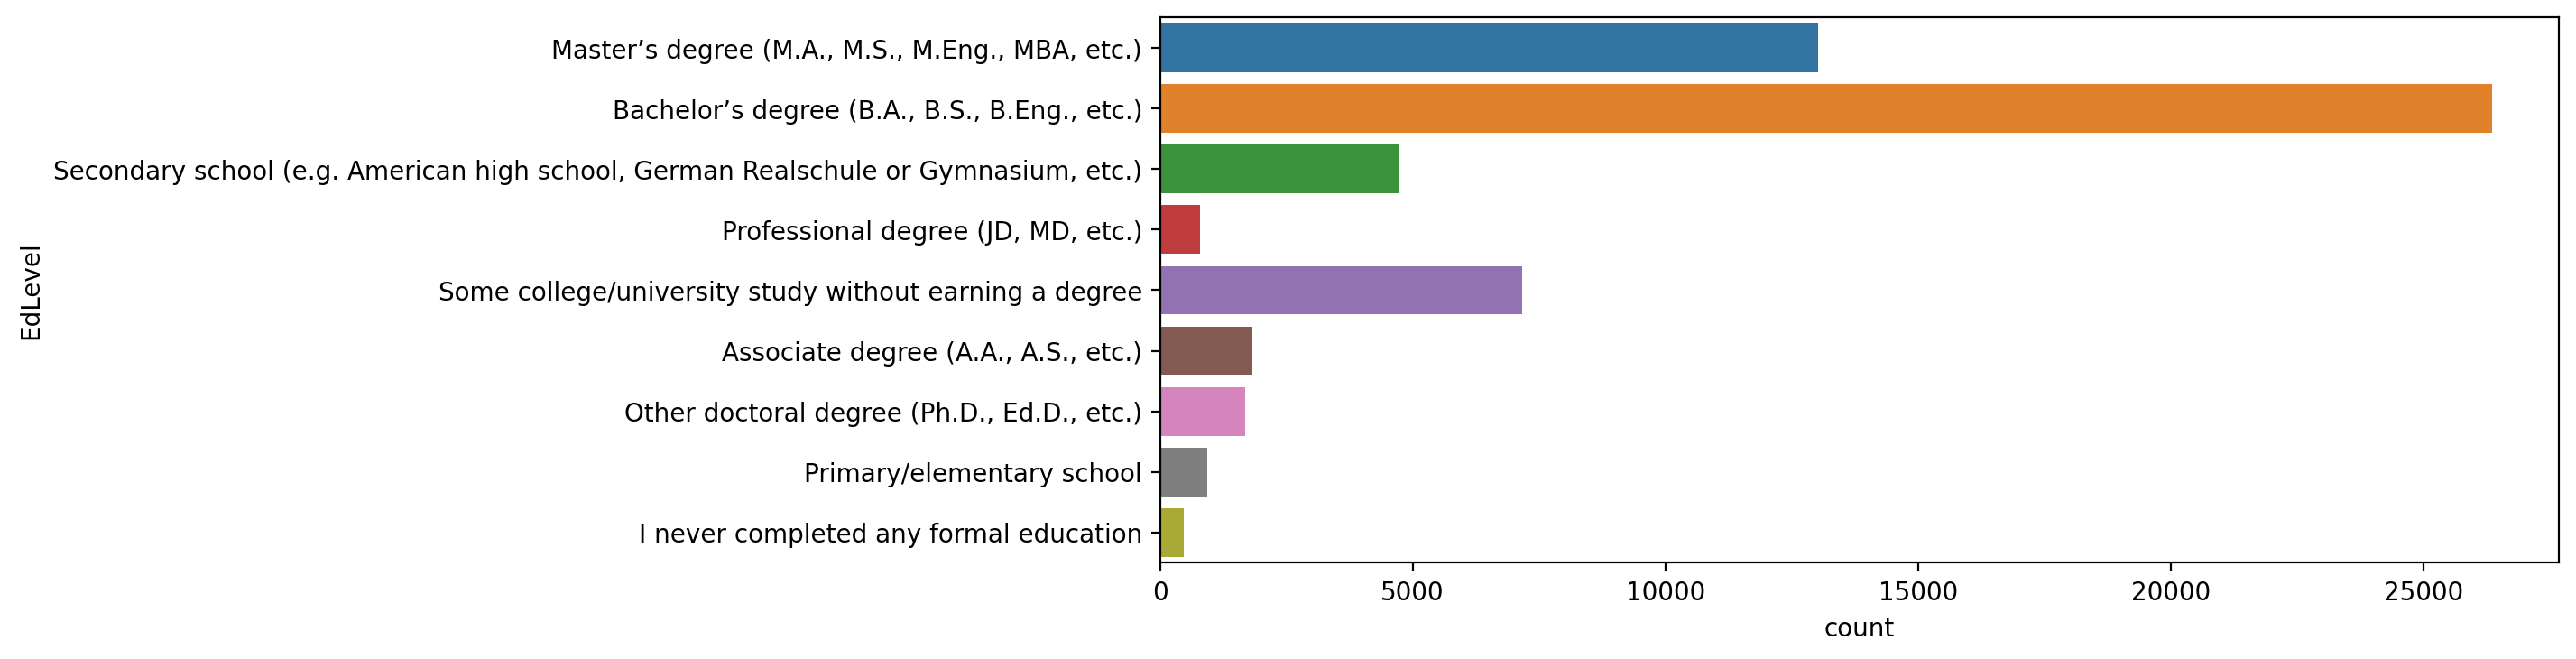

In [50]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(y = survey_df.EdLevel)


It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

In [51]:
Ed_count = survey_df.EdLevel.value_counts()

In [52]:
Ed_count

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26356
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13024
Some college/university study without earning a degree                                 7163
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4724
Associate degree (A.A., A.S., etc.)                                                    1831
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1681
Primary/elementary school                                                               929
Professional degree (JD, MD, etc.)                                                      793
I never completed any formal education                                                  480
Name: EdLevel, dtype: int64

<AxesSubplot:xlabel='EdLevel'>

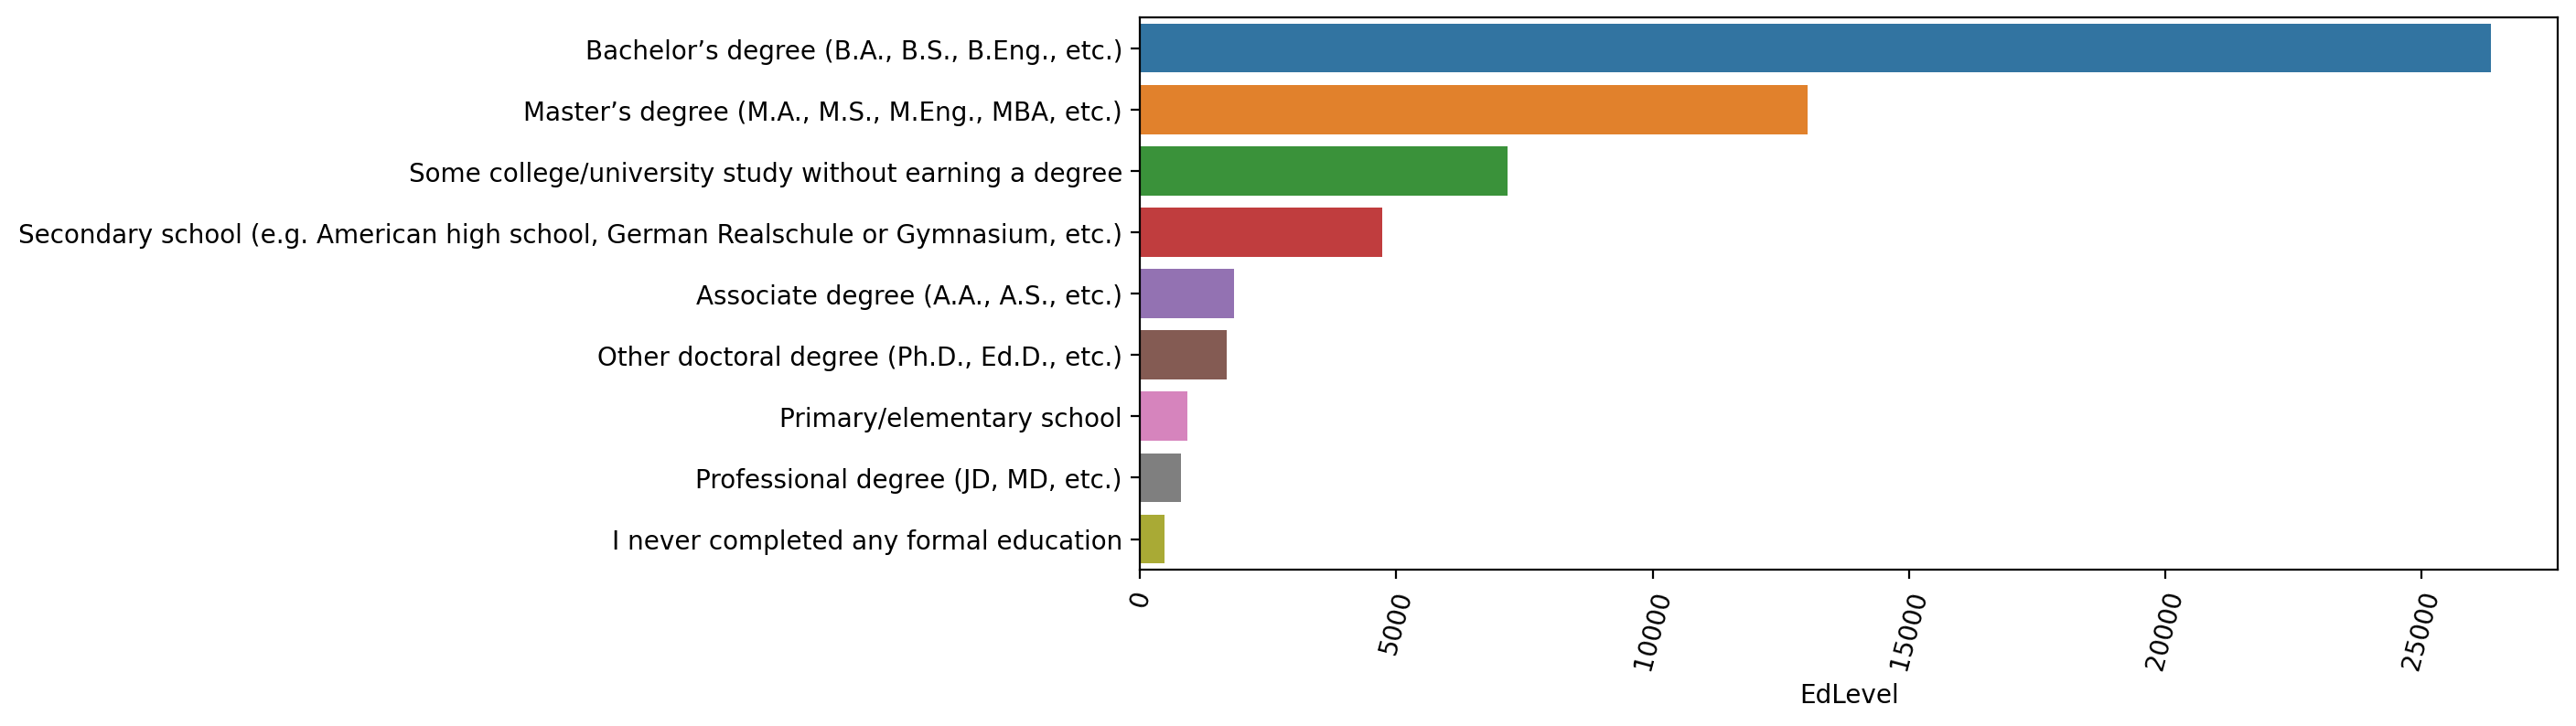

In [53]:
plt.figure(figsize=(10,4),dpi=200)
plt.xticks(rotation = 75)
sns.barplot(y= Ed_count.index, x = Ed_count)

In [54]:
schema.UndergradMajor

'What was your primary field of study?'

In [55]:
survey_df.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   31353
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4735
Information systems, information technology, or system administration              4041
A natural science (such as biology, chemistry, physics, etc.)                      2185
Mathematics or statistics                                                          1836
Web development or web design                                                      1773
A business discipline (such as accounting, finance, marketing, etc.)               1367
A humanities discipline (such as literature, history, philosophy, etc.)             997
A social science (such as anthropology, psychology, political science, etc.)        922
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      715
I never declared a major                                                            448
A health science (such as nursin

<AxesSubplot:xlabel='count', ylabel='UndergradMajor'>

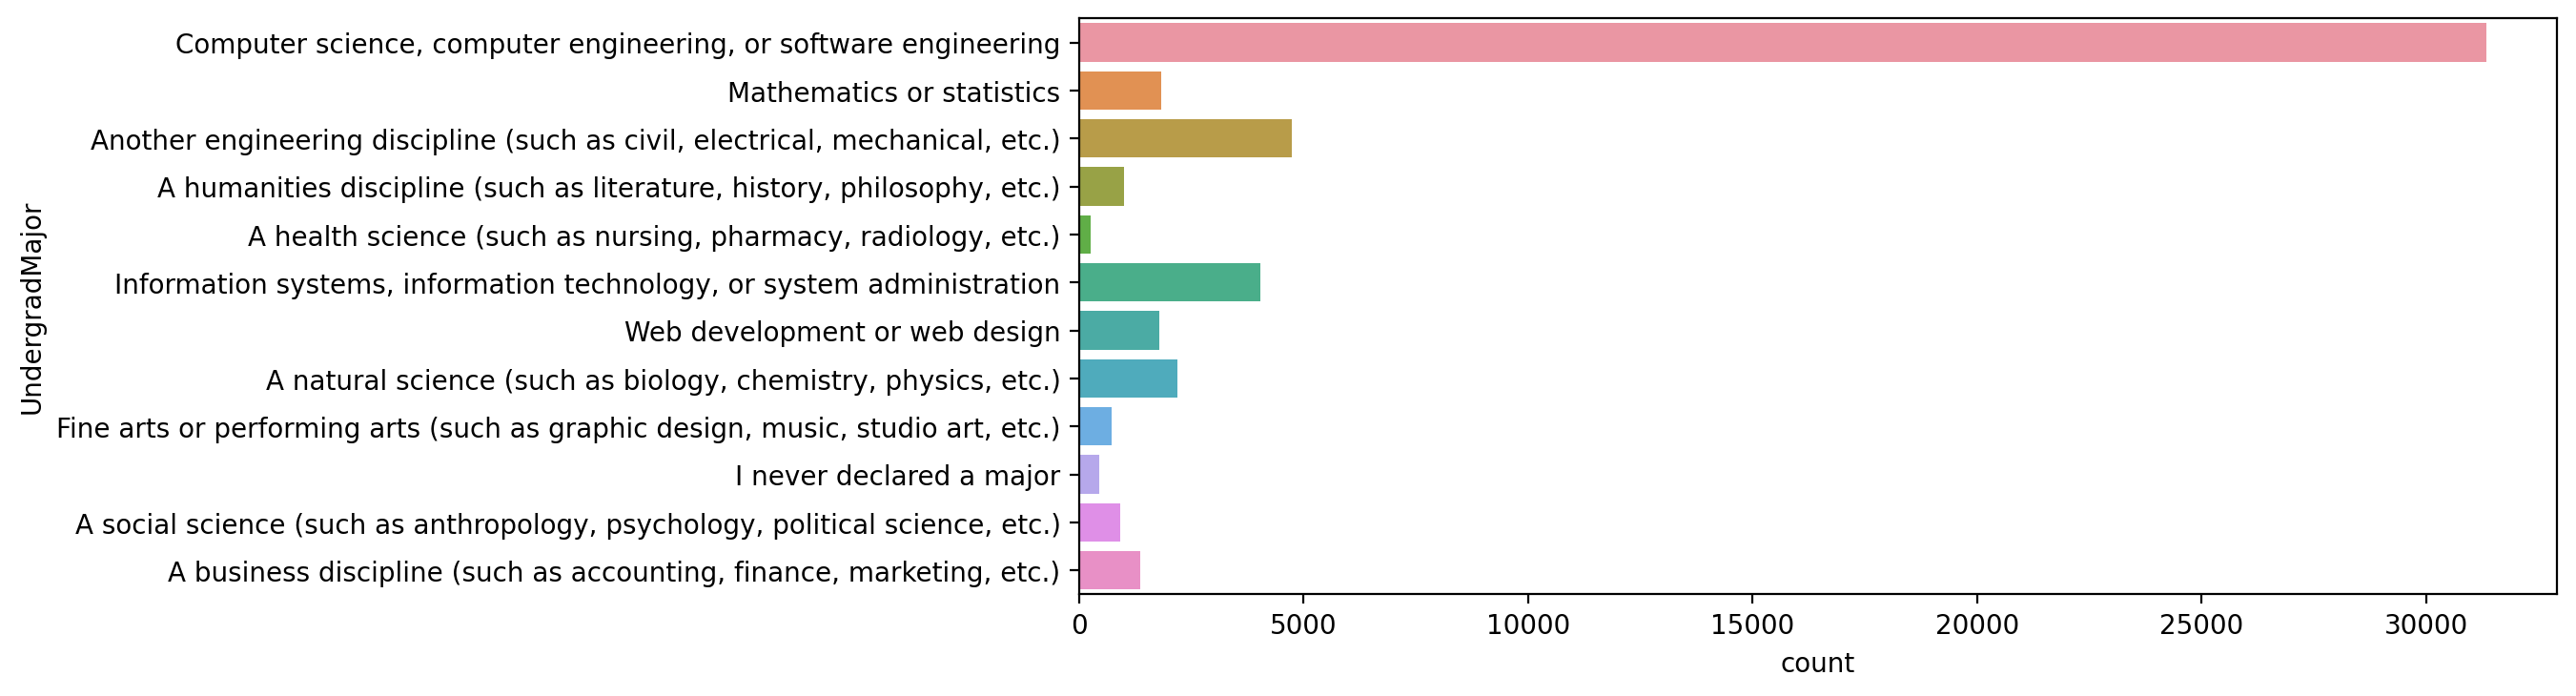

In [56]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(y = survey_df.UndergradMajor)

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

In [57]:
perc_major = survey_df.UndergradMajor.value_counts()/survey_df.UndergradMajor.count()*100

In [58]:
perc_major

Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                                        

<AxesSubplot:xlabel='UndergradMajor'>

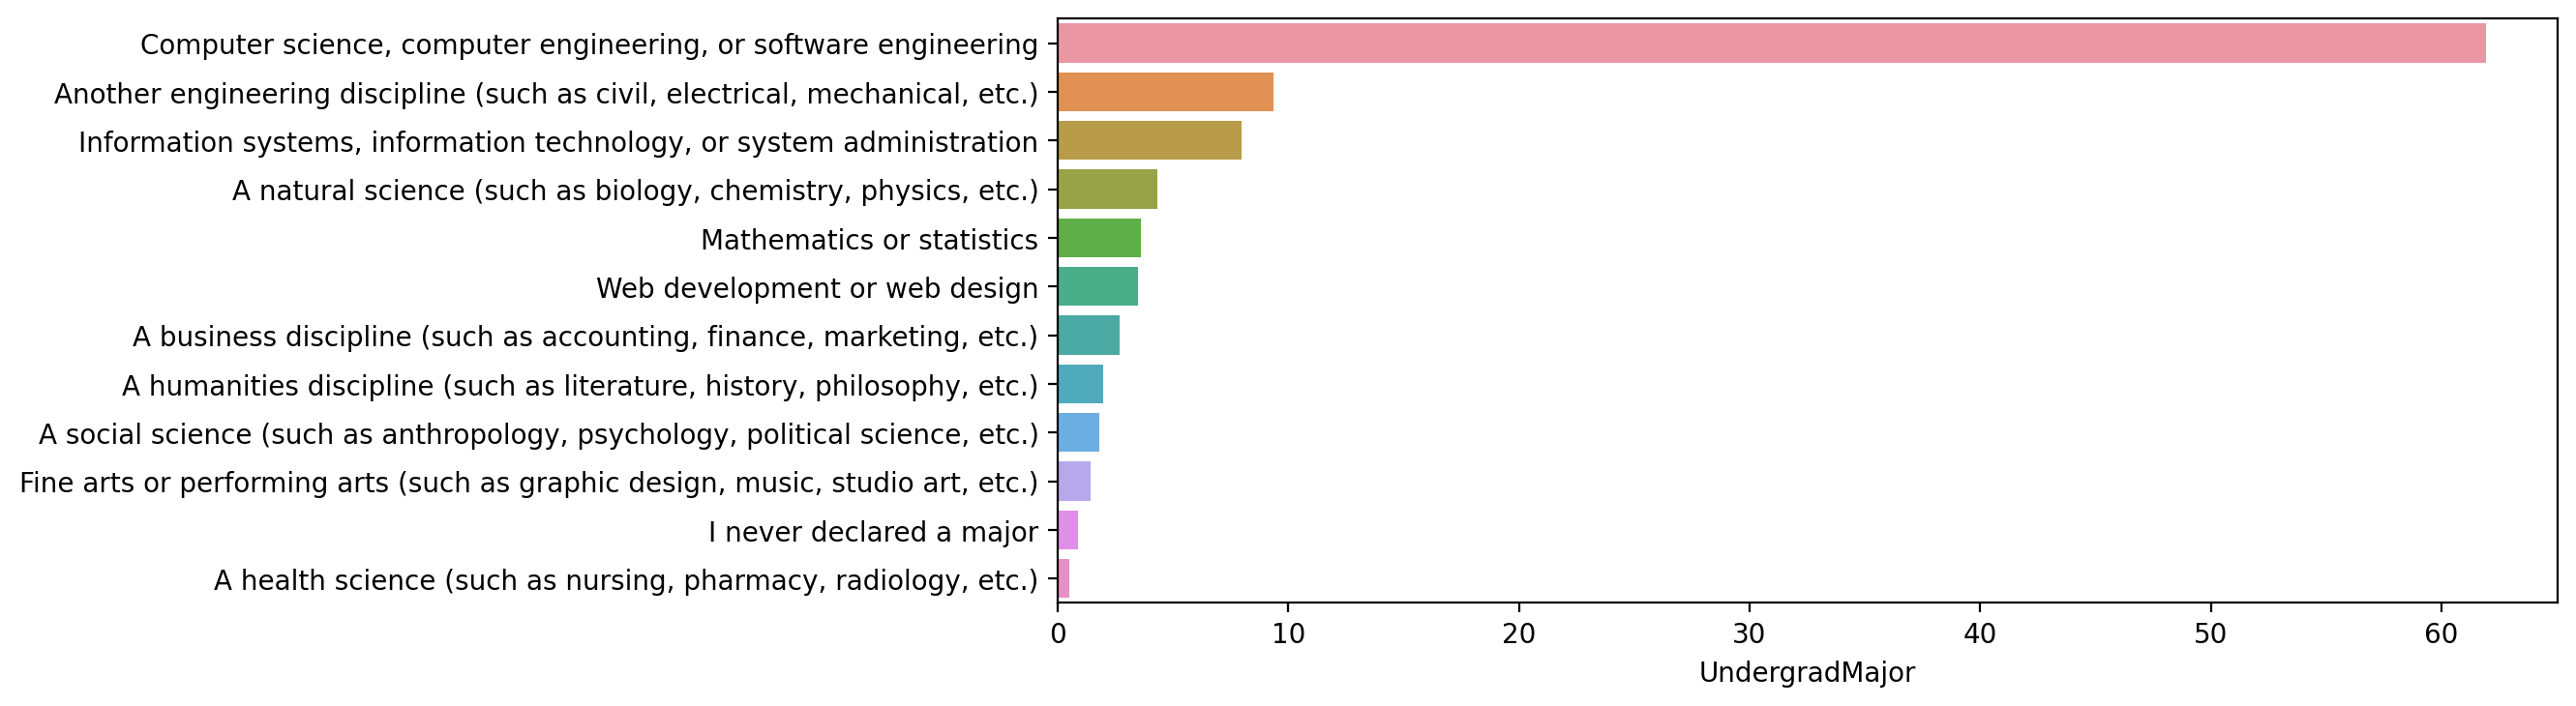

In [59]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(y = perc_major.index, x = perc_major)

### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [60]:
schema.Employment

'Which of the following best describes your current employment status?'

In [61]:
emp_count = survey_df.Employment.value_counts()

In [62]:
emp_count

Employed full-time                                      44958
Student                                                  7734
Independent contractor, freelancer, or self-employed     5619
Not employed, but looking for work                       2324
Employed part-time                                       2200
Not employed, and not looking for work                    318
Retired                                                   241
Name: Employment, dtype: int64

<AxesSubplot:xlabel='Employment'>

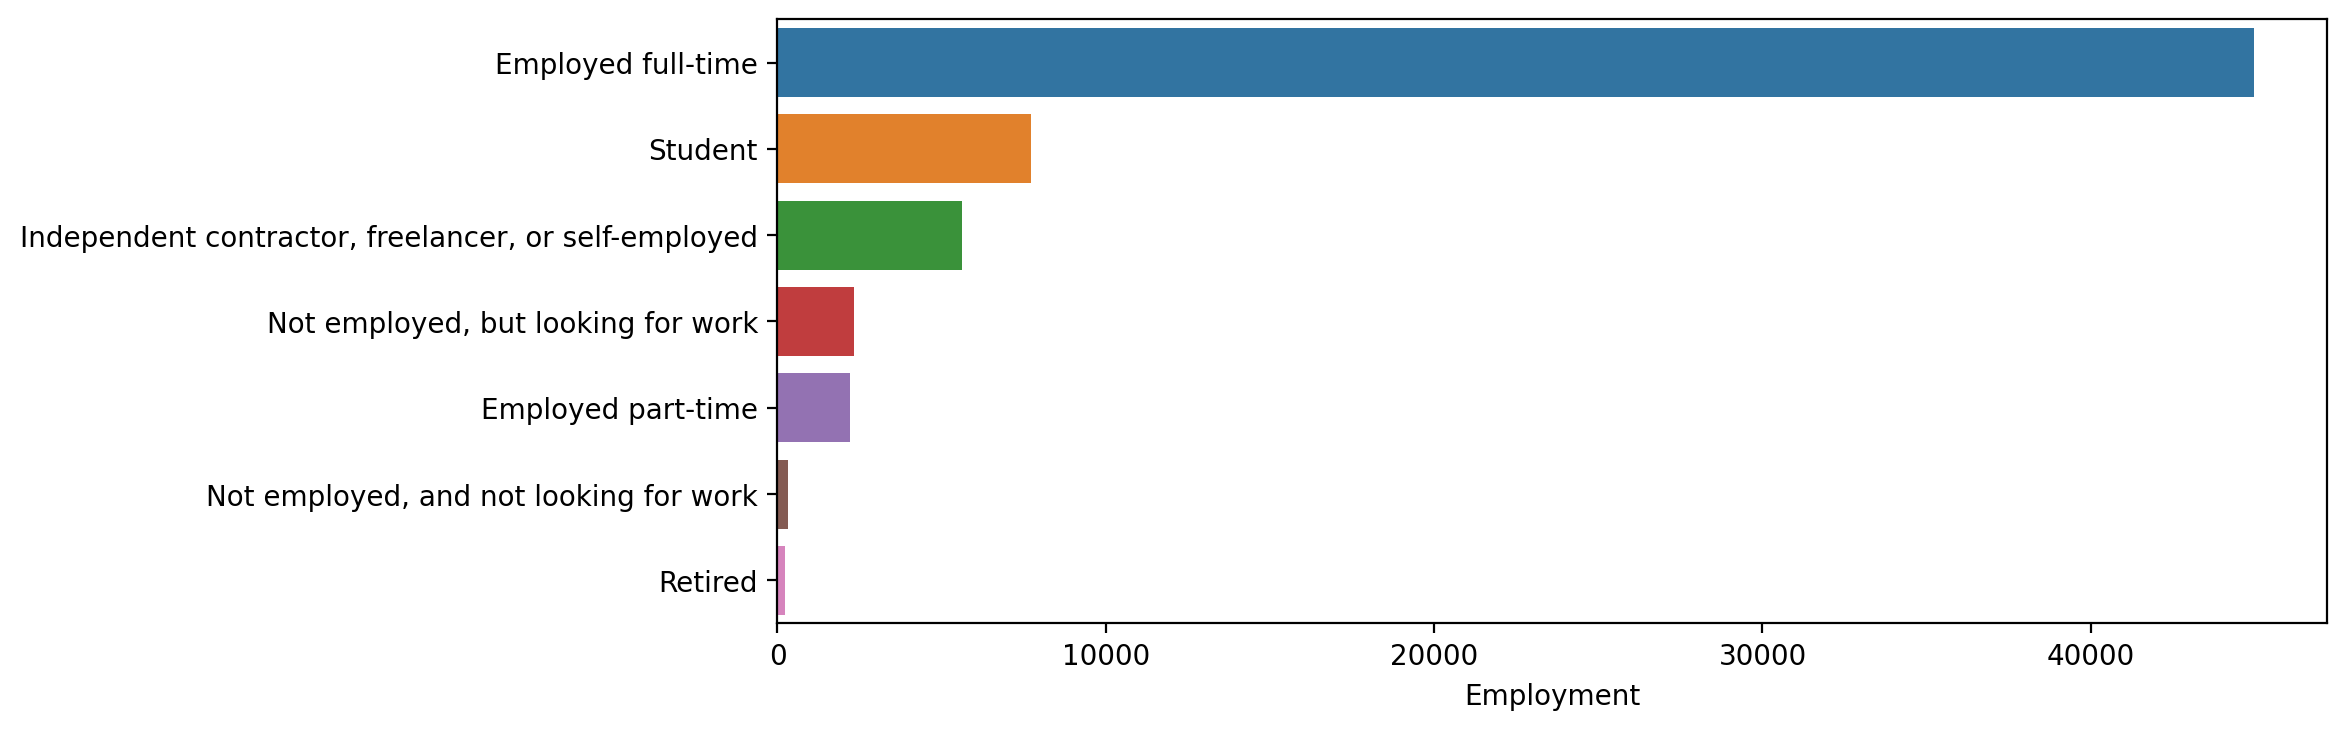

In [63]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(y = emp_count.index, x = emp_count)

It appears that close to 10% of respondents are employed part time or as freelancers.

In [64]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [65]:
survey_df.DevType

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 64306, dtype: object

In [66]:
def split_multicol(col_series):
    result_df = col_series.to_frame()
    options = []

    for idx,value in col_series[col_series.notnull()].iteritems():
        for option in value.split(";"):
            
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
                
            result_df.at[idx,option] = True
    
    return result_df[options]

In [67]:
dev_type_df = split_multicol(survey_df.DevType)

In [68]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
dev_total = dev_type_df.sum().sort_values()

<AxesSubplot:>

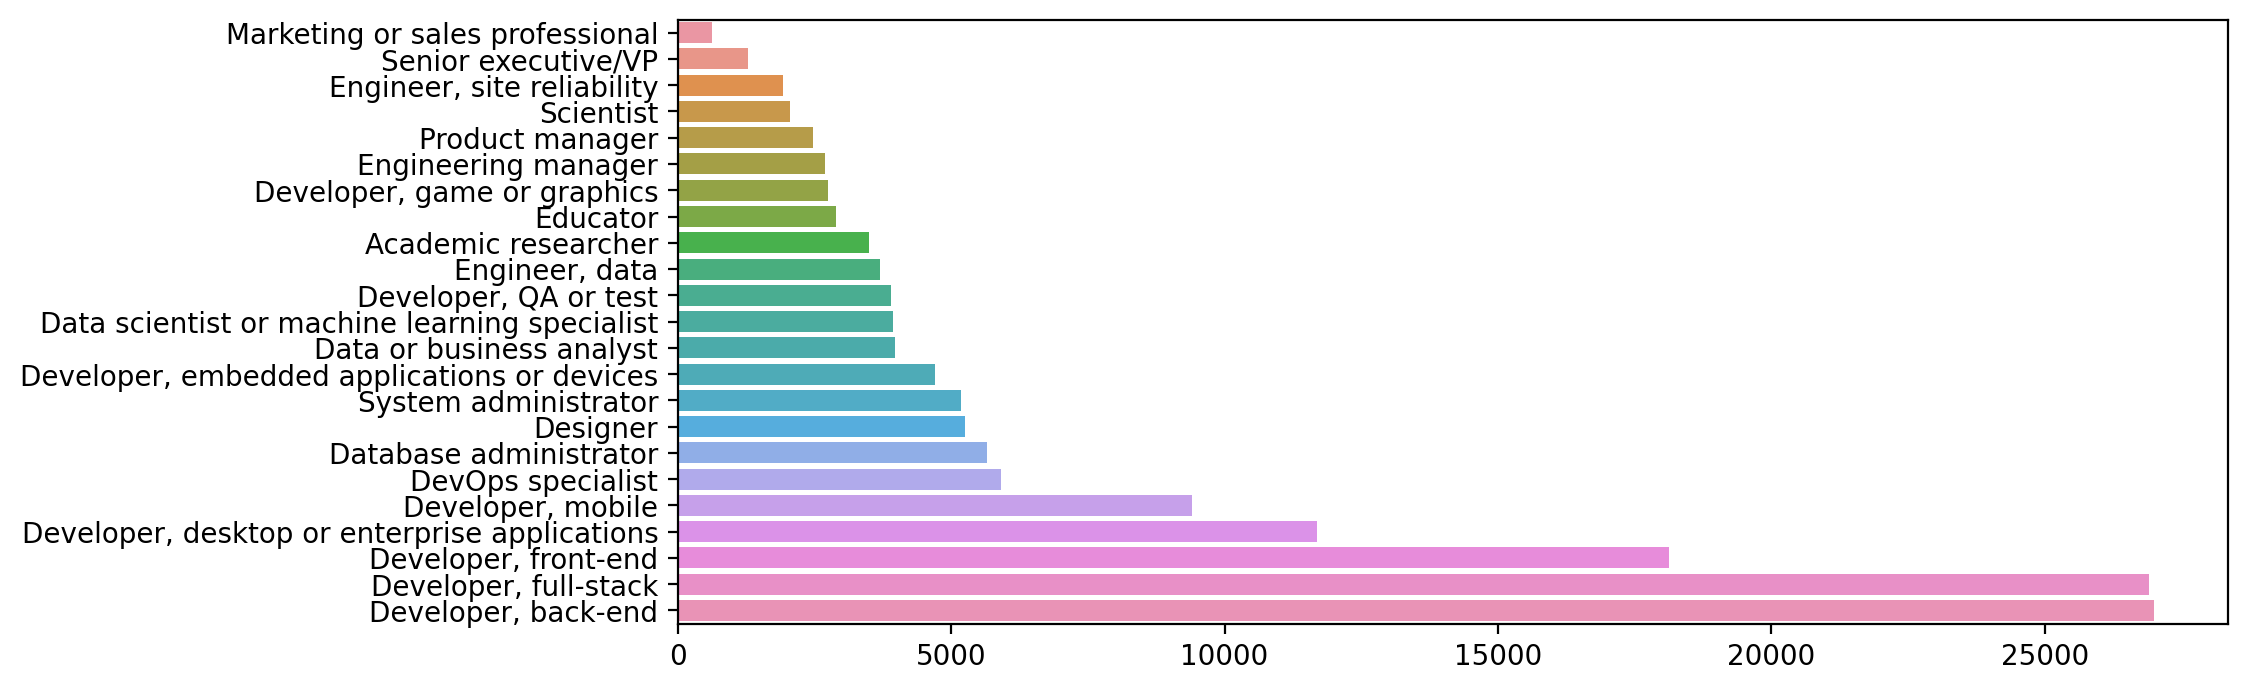

In [70]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(y = dev_total.index, x = dev_total)

As one might expect, the most common roles include "Developer" in the name.

In [71]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [72]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [73]:
lang_total = split_multicol(survey_df.LanguageWorkedWith)

In [74]:
lang_total_count = lang_total.sum().sort_values(ascending = False)

In [75]:
lang_total_count

JavaScript               38515
HTML/CSS                 35884
SQL                      31153
Python                   25080
Java                     22905
Bash/Shell/PowerShell    18803
C#                       17879
PHP                      14874
TypeScript               14444
C++                      13578
C                        12370
Go                        4989
Kotlin                    4429
Ruby                      4006
Assembly                  3503
VBA                       3469
Swift                     3361
R                         3257
Rust                      2893
Objective-C               2317
Dart                      2262
Scala                     2026
Perl                      1773
Haskell                   1197
Julia                      503
dtype: int64

<AxesSubplot:>

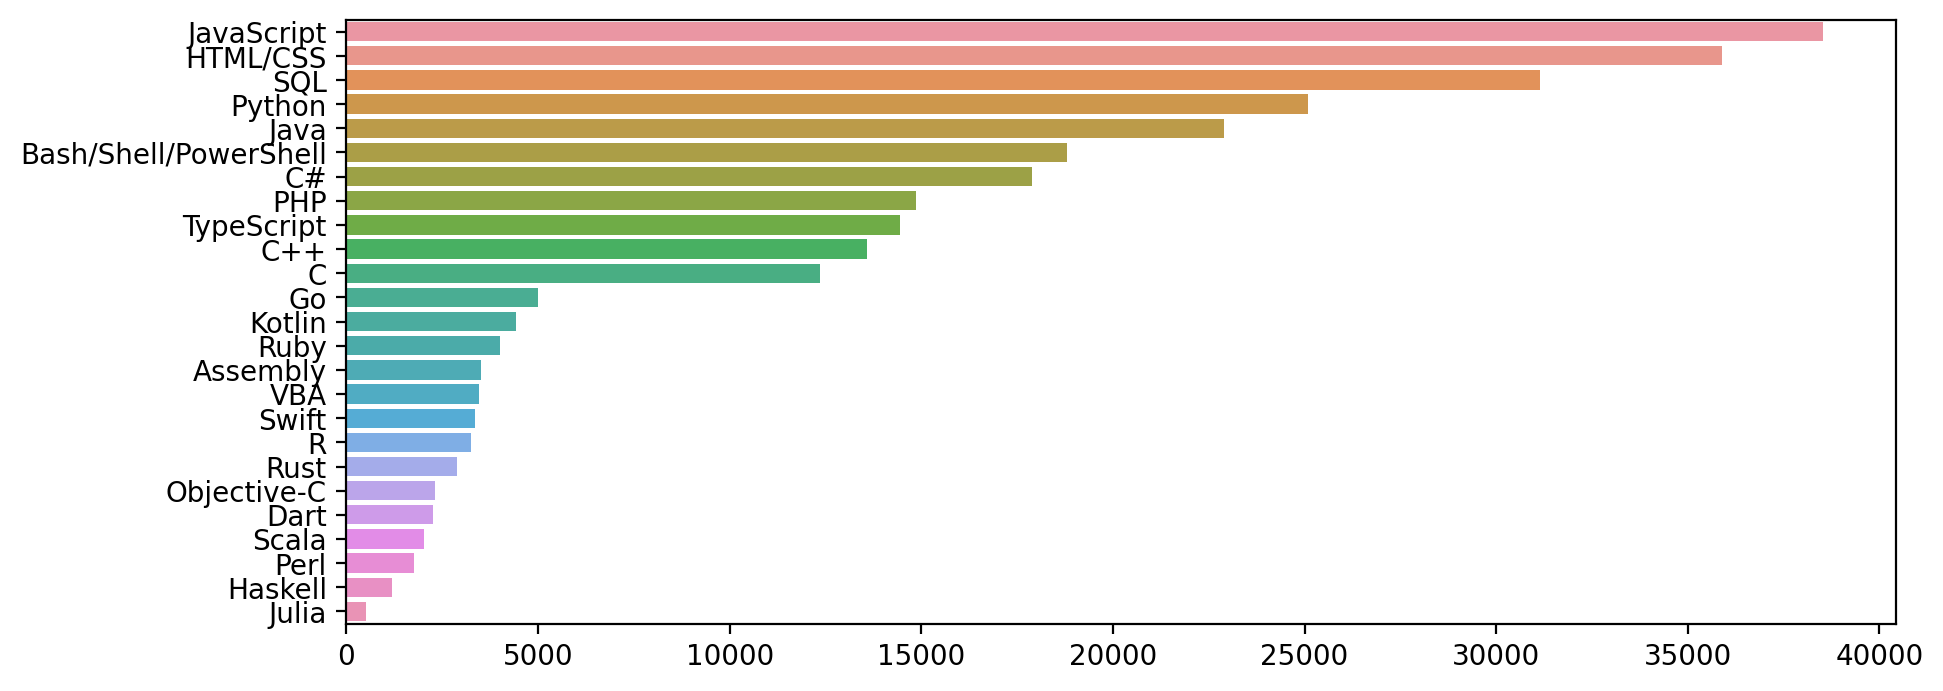

In [76]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(y = lang_total_count.index, x = lang_total_count)

Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades

In [77]:
languages_interested_df = split_multicol(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

<AxesSubplot:>

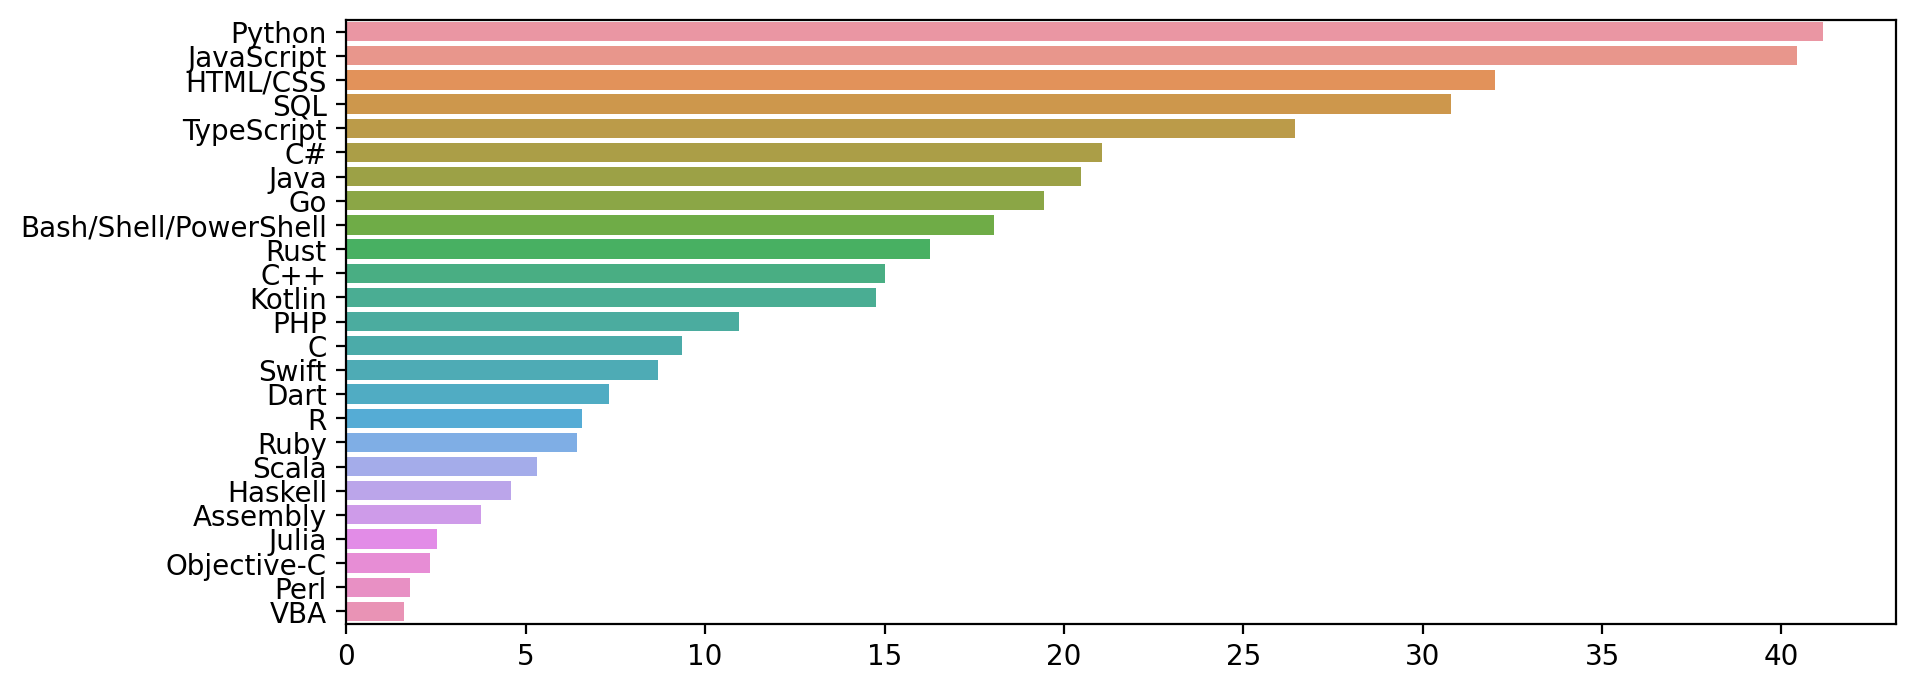

In [78]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(y = languages_interested_percentages.index, x = languages_interested_percentages)

In [79]:
countries_df = survey_df.groupby("Country").mean().sort_values("WorkWeekHrs", ascending = False)

In [80]:
countries_df

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
Country,,,,,
Kuwait,29.111111,14.000000,12.785714,5.727273,58.222222
Iraq,24.736842,17.657143,9.828571,7.250000,52.153846
Grenada,NaN,11.000000,9.000000,5.000000,50.000000
Maldives,18.666667,14.333333,8.125000,4.142857,47.300000
Afghanistan,23.571429,16.813953,8.590909,9.241379,46.500000
...,...,...,...,...,...
North Korea,NaN,NaN,NaN,NaN,NaN
Saint Lucia,31.000000,29.000000,NaN,NaN,NaN
Sierra Leone,27.000000,19.833333,10.000000,5.000000,NaN


In [81]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250]

In [82]:
high_response_countries_df

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
Country,,,,,
Iran,27.521490,16.105769,9.132353,6.108434,44.337748
Israel,32.605649,15.306261,13.200686,9.654008,43.915094
China,26.988636,16.376384,8.723247,6.493506,42.150000
United States,33.722058,15.030413,15.607777,11.047805,41.802982
Greece,31.725490,15.827684,13.263456,8.857692,41.402724
Viet Nam,25.786585,16.953125,7.048193,5.092105,41.391667
South Africa,32.127027,16.863135,12.973094,9.327778,41.023460
Turkey,29.522772,16.658683,10.610860,7.149798,40.982143
Sri Lanka,26.965714,16.889831,8.214592,5.119760,40.612245


In [83]:
survey_df.Country.value_counts()[survey_df.Country.value_counts() > 250]

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Turkey                  771
Israel                  649
Switzerland             628
Romania                 596
Bangladesh              595
Nigeria                 588
Mexico                  537
Ukraine                 536
Austria                 531
Czech Republic          495
Indonesia               494
South Africa            493
Iran                    483
Belgium                 457
Ireland                 444
Philippines             404
Argentina               392
Greece                  389
Denmark                 389
Portugal                386
Norway              

In [84]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Age', ylabel='YearsCodePro'>

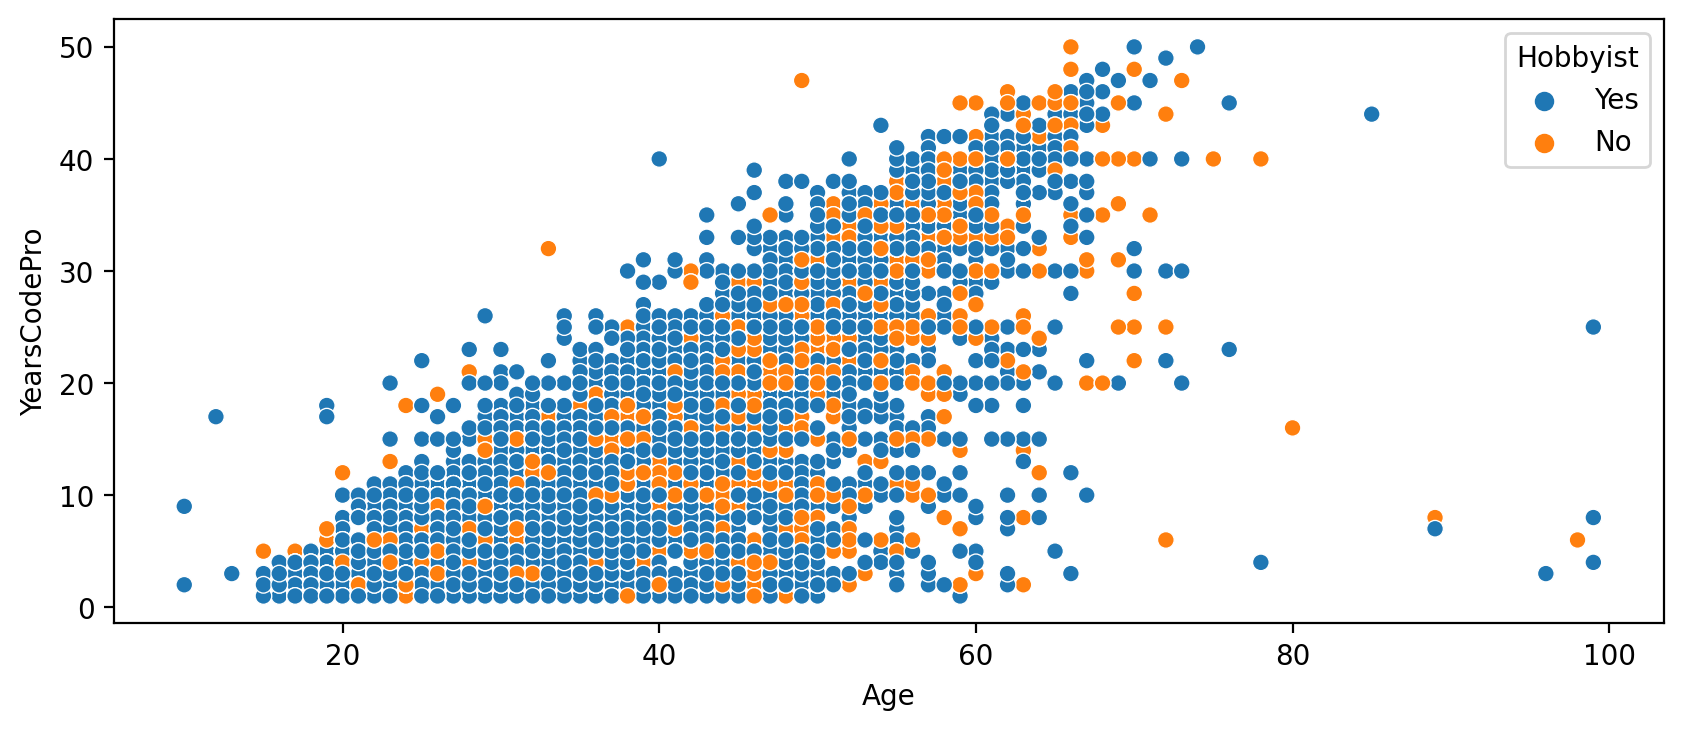

In [85]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x = "Age", y = "YearsCodePro", data = survey_df, hue = "Hobbyist" )

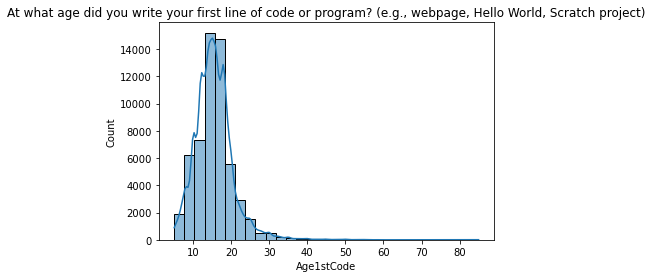

In [86]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);